In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
28,29,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0
152,153,1,toyota corolla 1200,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
64,65,0,mazda 626,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245.0
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0


In [4]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [5]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

DATA DICTONARY

1 Car_ID: Unique id of each observation
2 Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
3 carCompany: Name of car company
4 fueltype: Car fuel type i.e gas or diesel
5 aspiration: Aspiration used in a car
6 doornumber: Number of doors in a car
7 carbody: body of car
8 drivewheel: type of drive wheel
9 enginelocation: Location of car engine
10 wheelbase: Weelbase of car 
11 carlength: Length of car
12 carwidth: Width of car
13 carheight: height of car
14 curbweight: The weight of a car without occupants or baggage.
15 enginetype: Type of engine.
16 cylindernumber: cylinder placed in the car
17 enginesize: Size of car
18 fuelsystem: Fuel system of car
19 boreratio: Boreratio of car
20 stroke: Stroke or volume inside the engine
21 compressionratio: compression ratio of car
22 horsepower: Horsepower
23 peakrpm: car peak rpm
24 citympg: Mileage in city
25 highwaympg: Mileage on highway
26 price: Price of car

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Check Missing Values

In [8]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


In [10]:
df.duplicated().sum()


0

In [11]:
print( f"Skewness: {df['price'].skew()}")

Skewness: 1.7776781560914454


Performing EDA

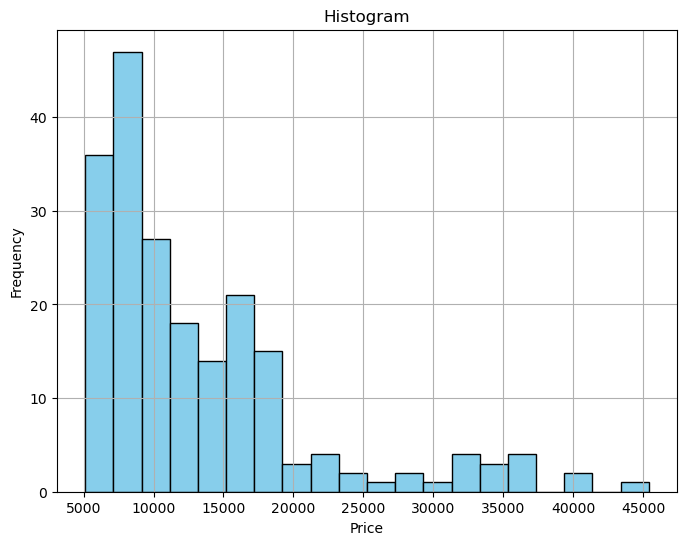

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [14]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

All Categorical Feature

In [15]:
# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


All Numerical Feature

In [16]:
# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print(numerical_columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [17]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [19]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

Performing EDA

Categorical Feature Univariate Analysis


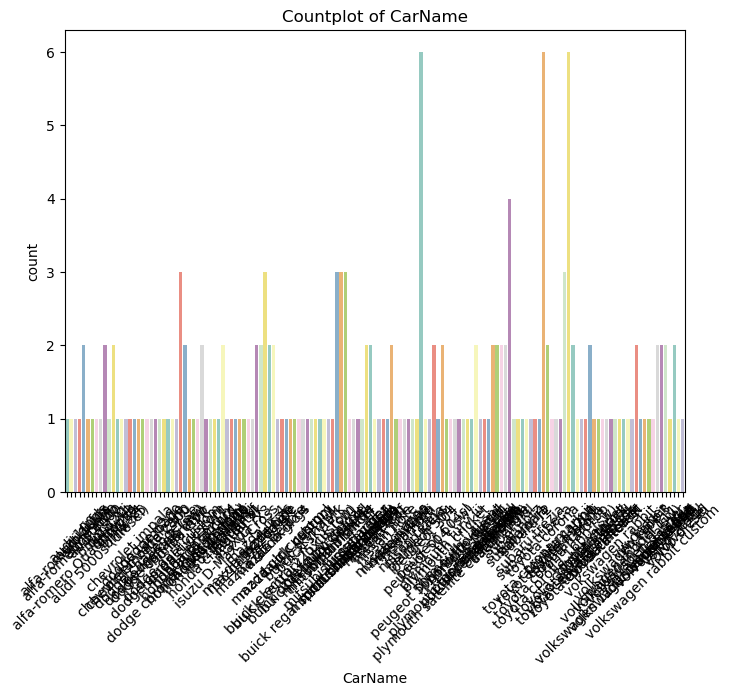

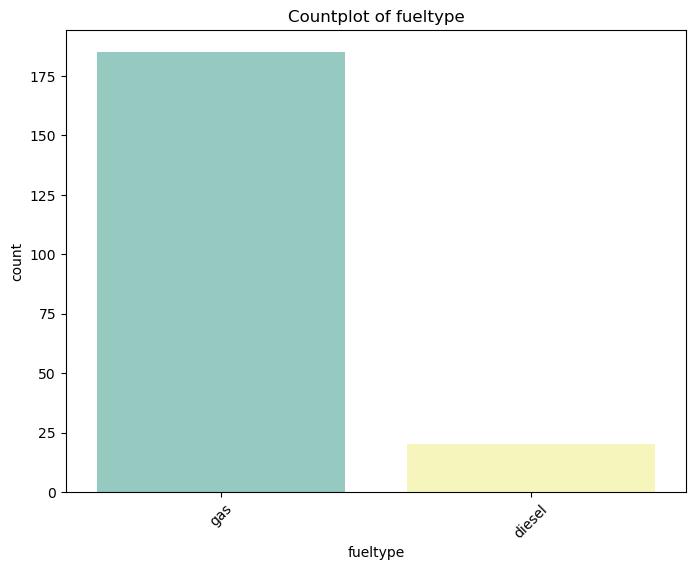

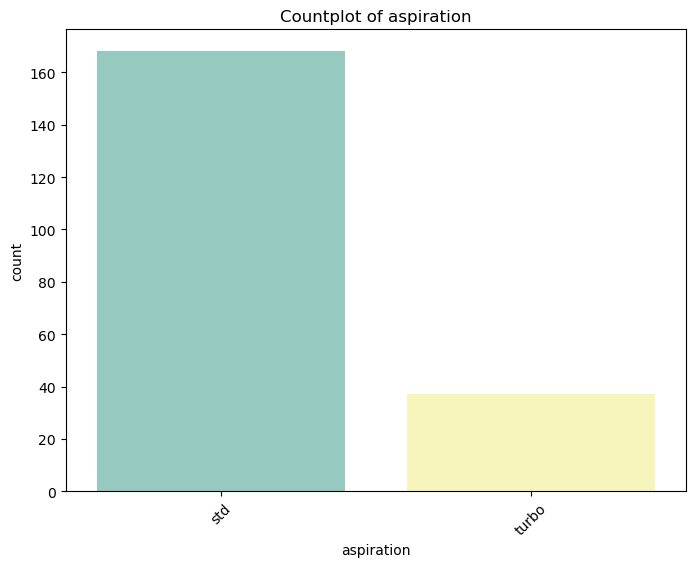

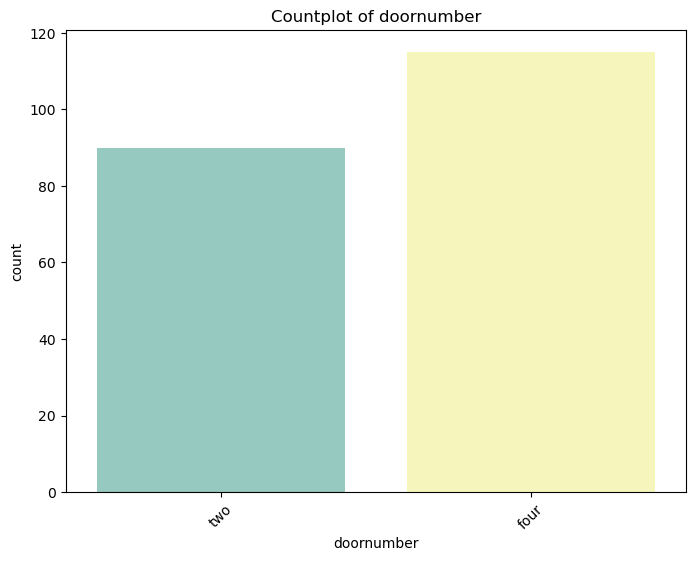

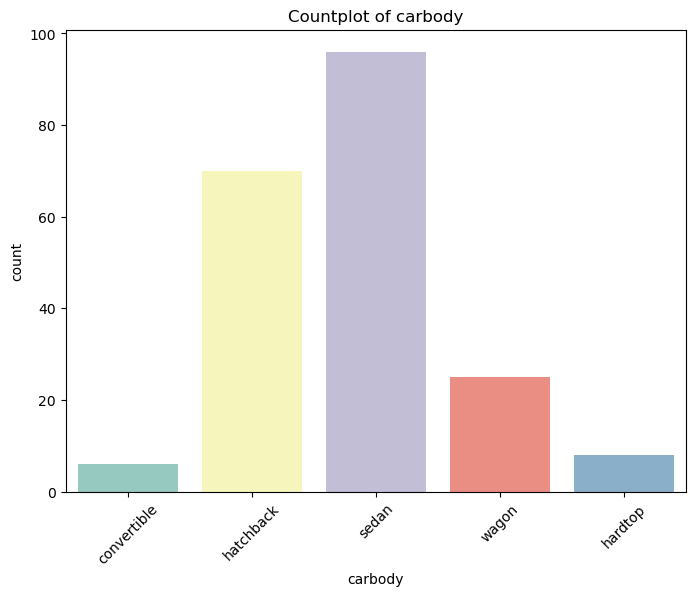

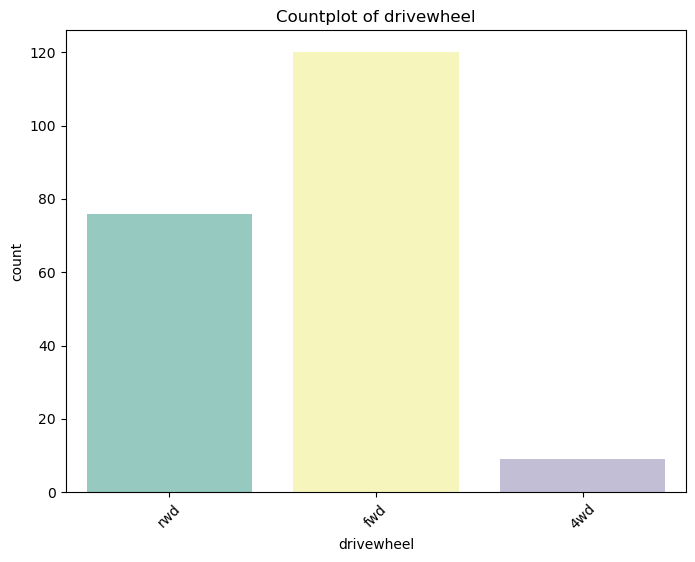

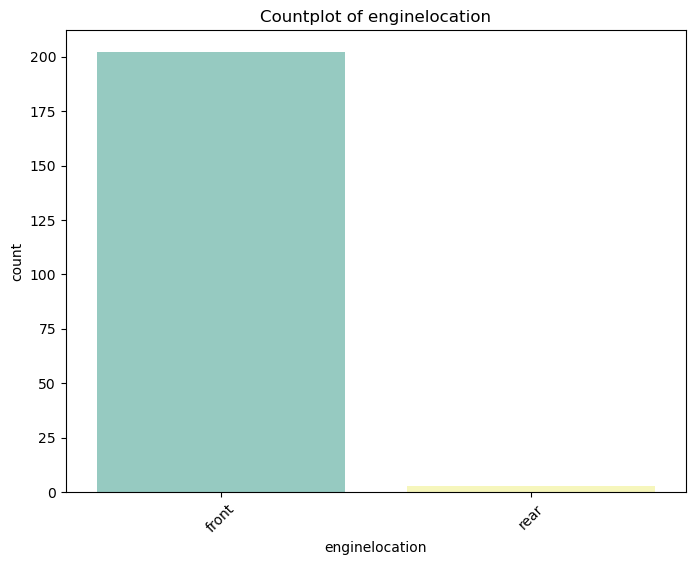

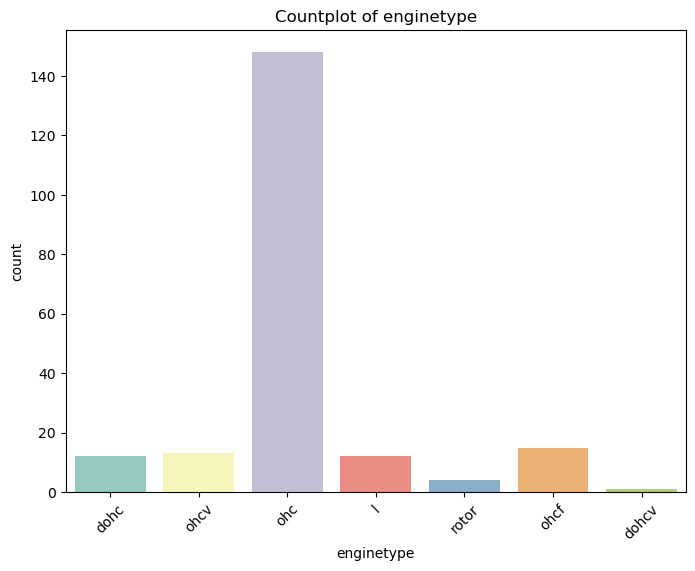

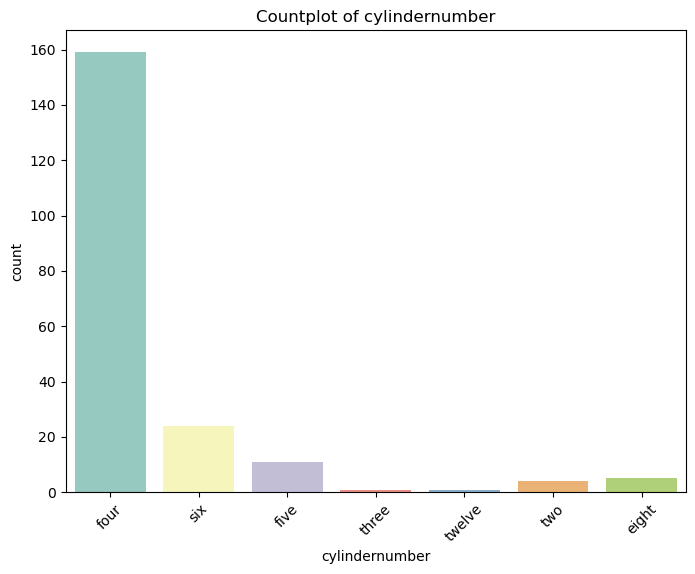

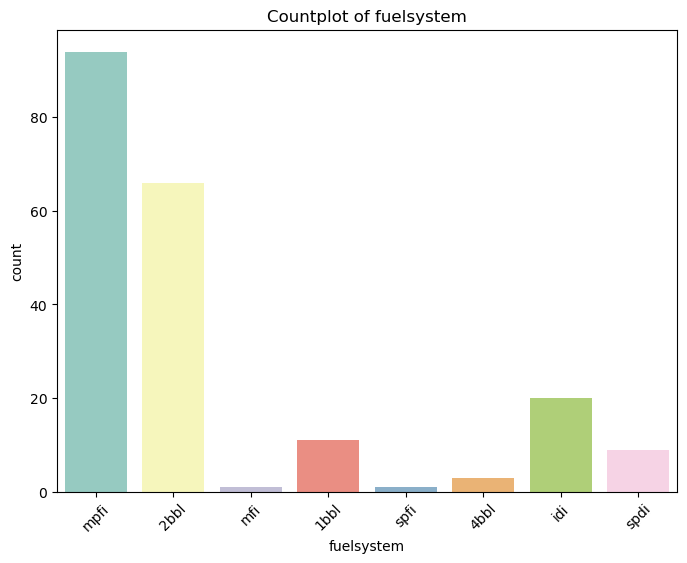

In [20]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='Set3')
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

Numerical Feature Univariate Analysis

In [21]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print(numerical_columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


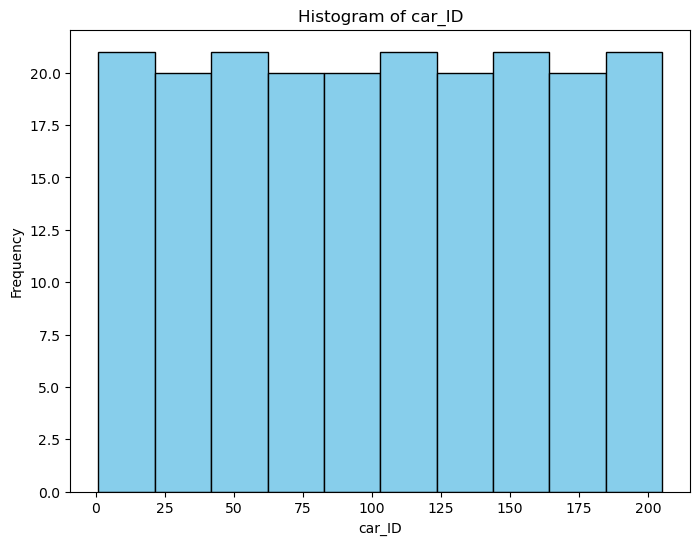

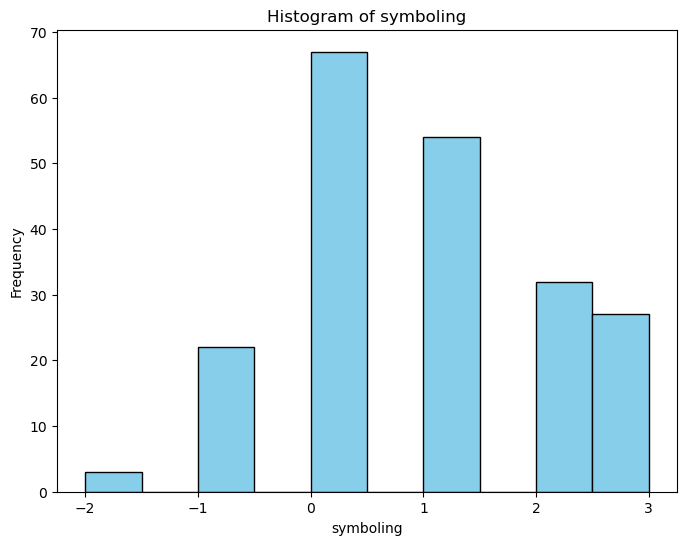

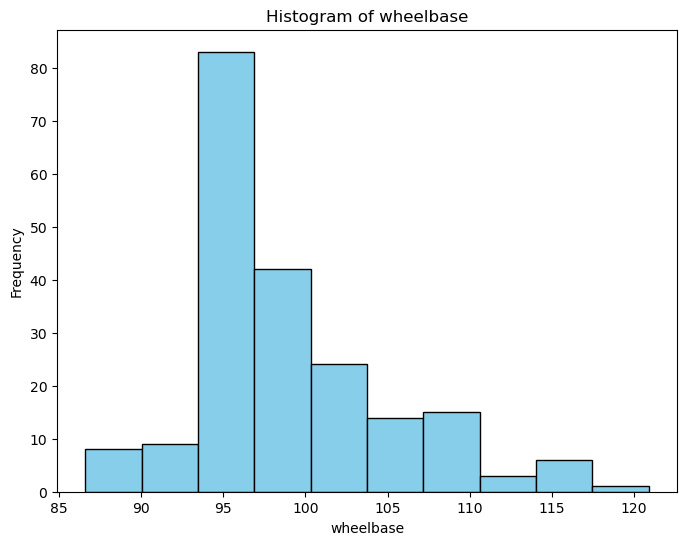

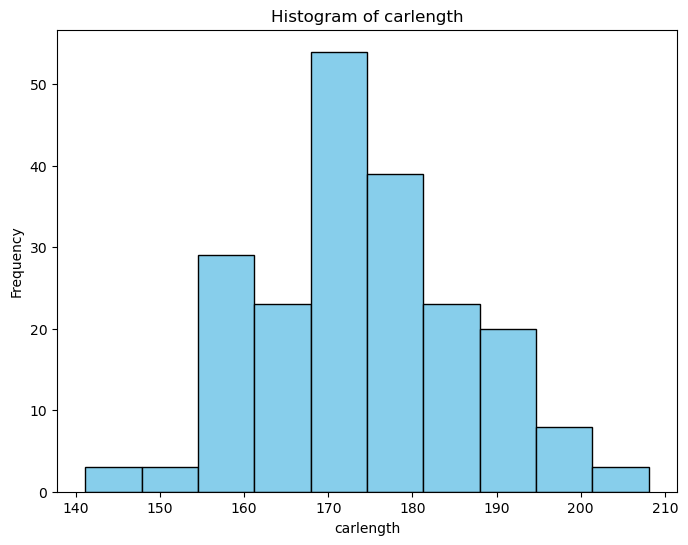

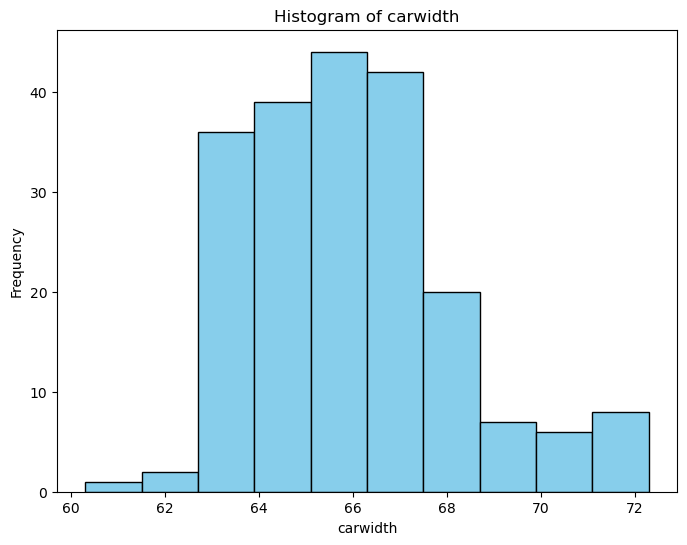

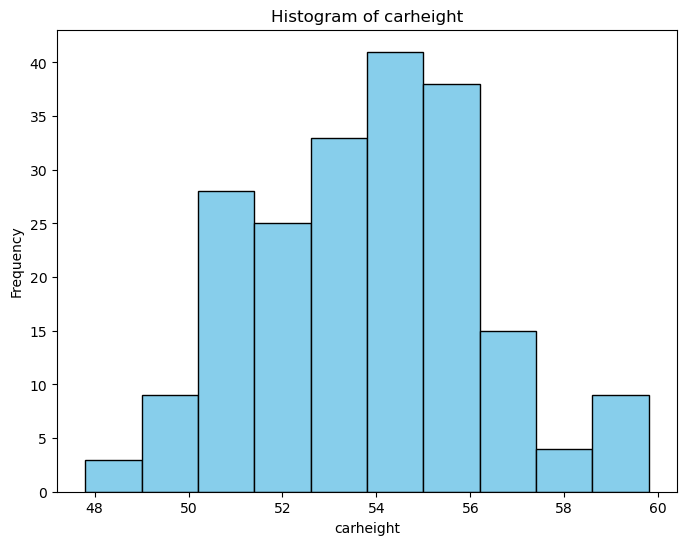

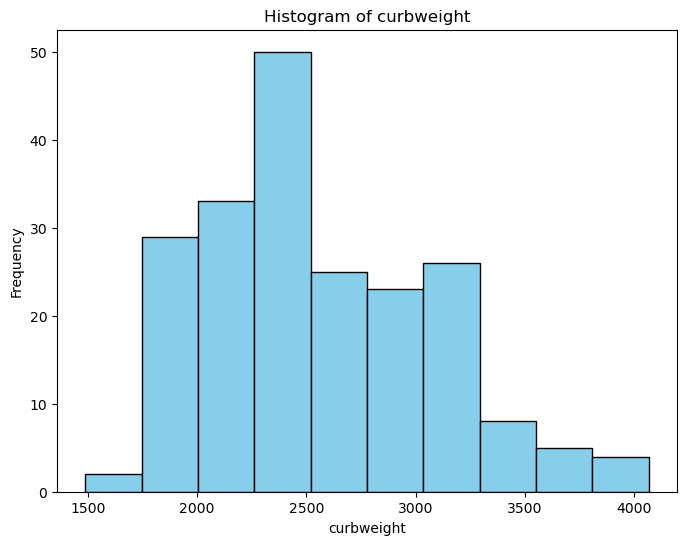

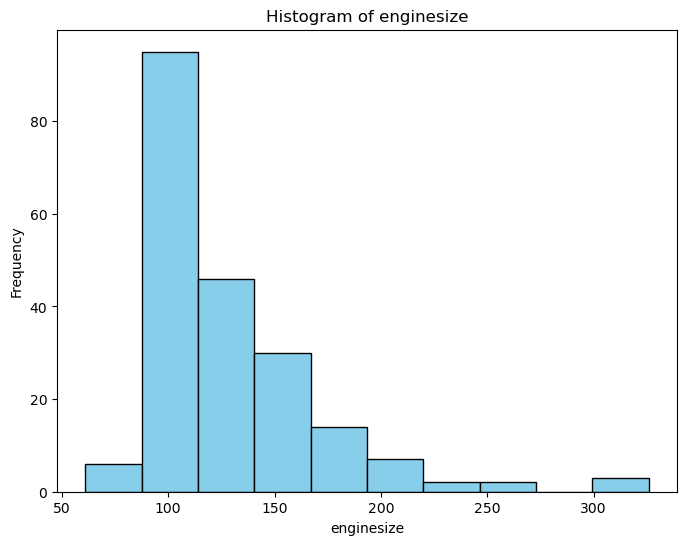

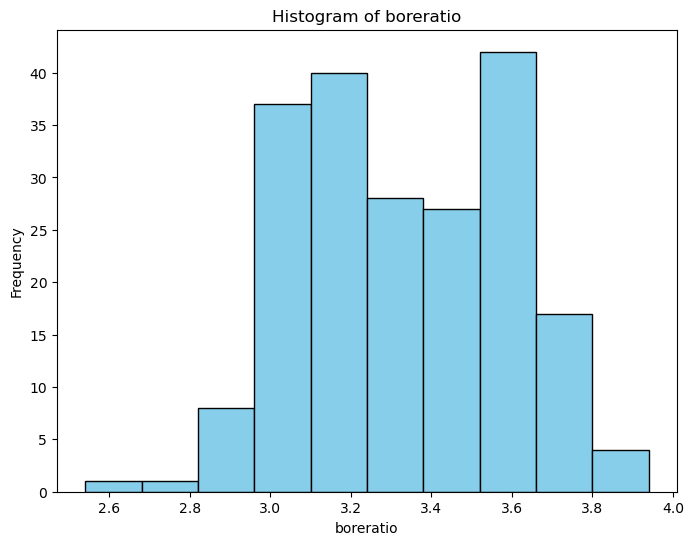

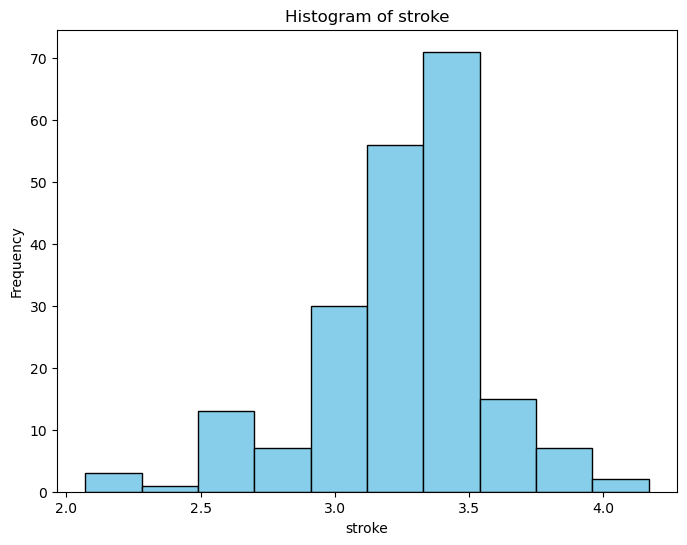

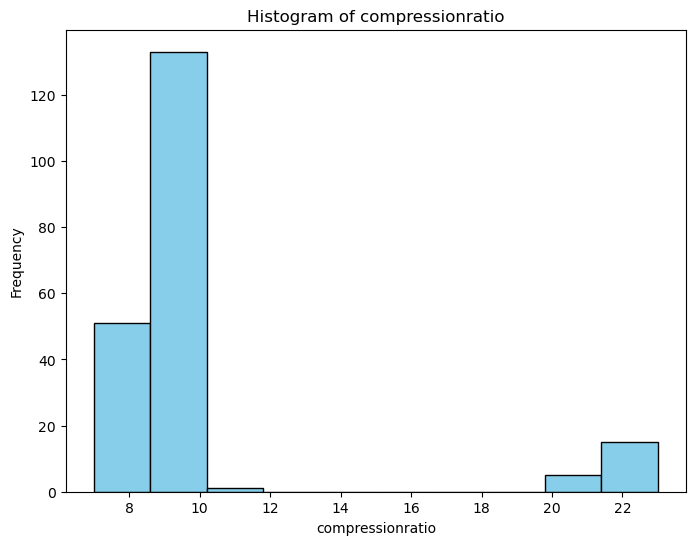

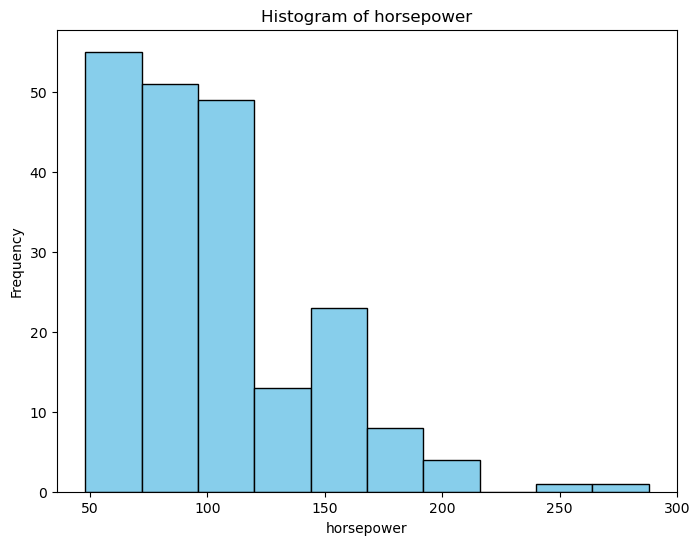

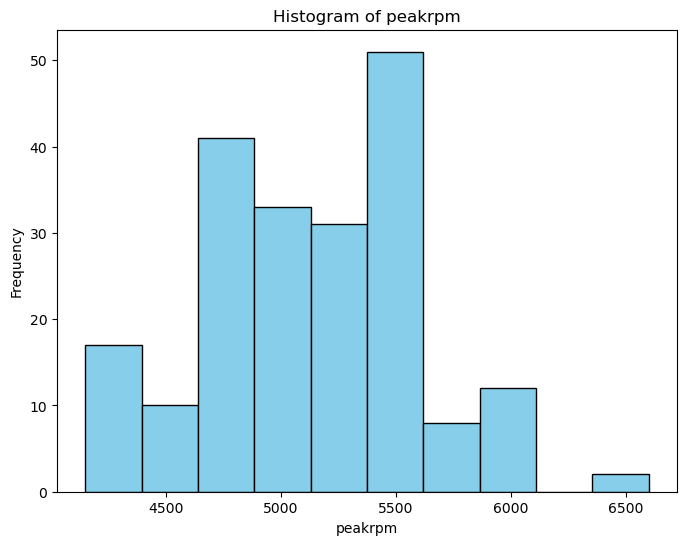

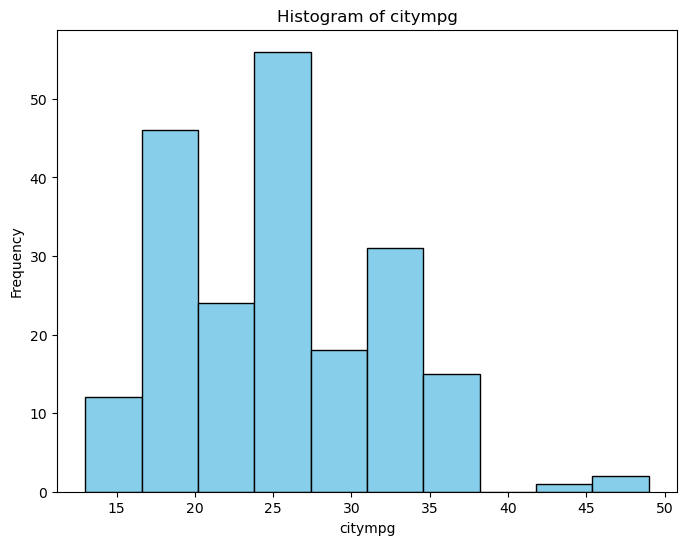

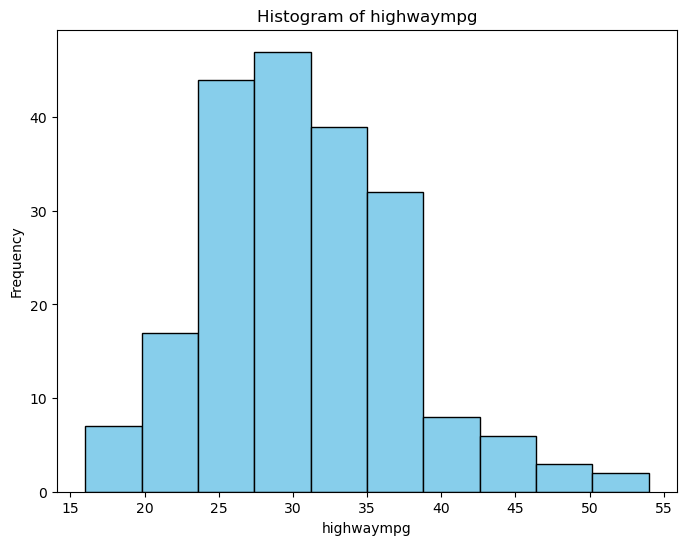

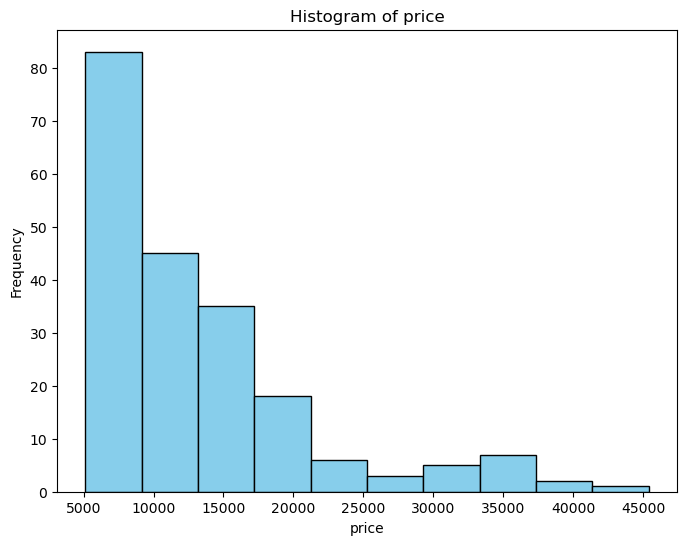

In [22]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Bivariate Analysis

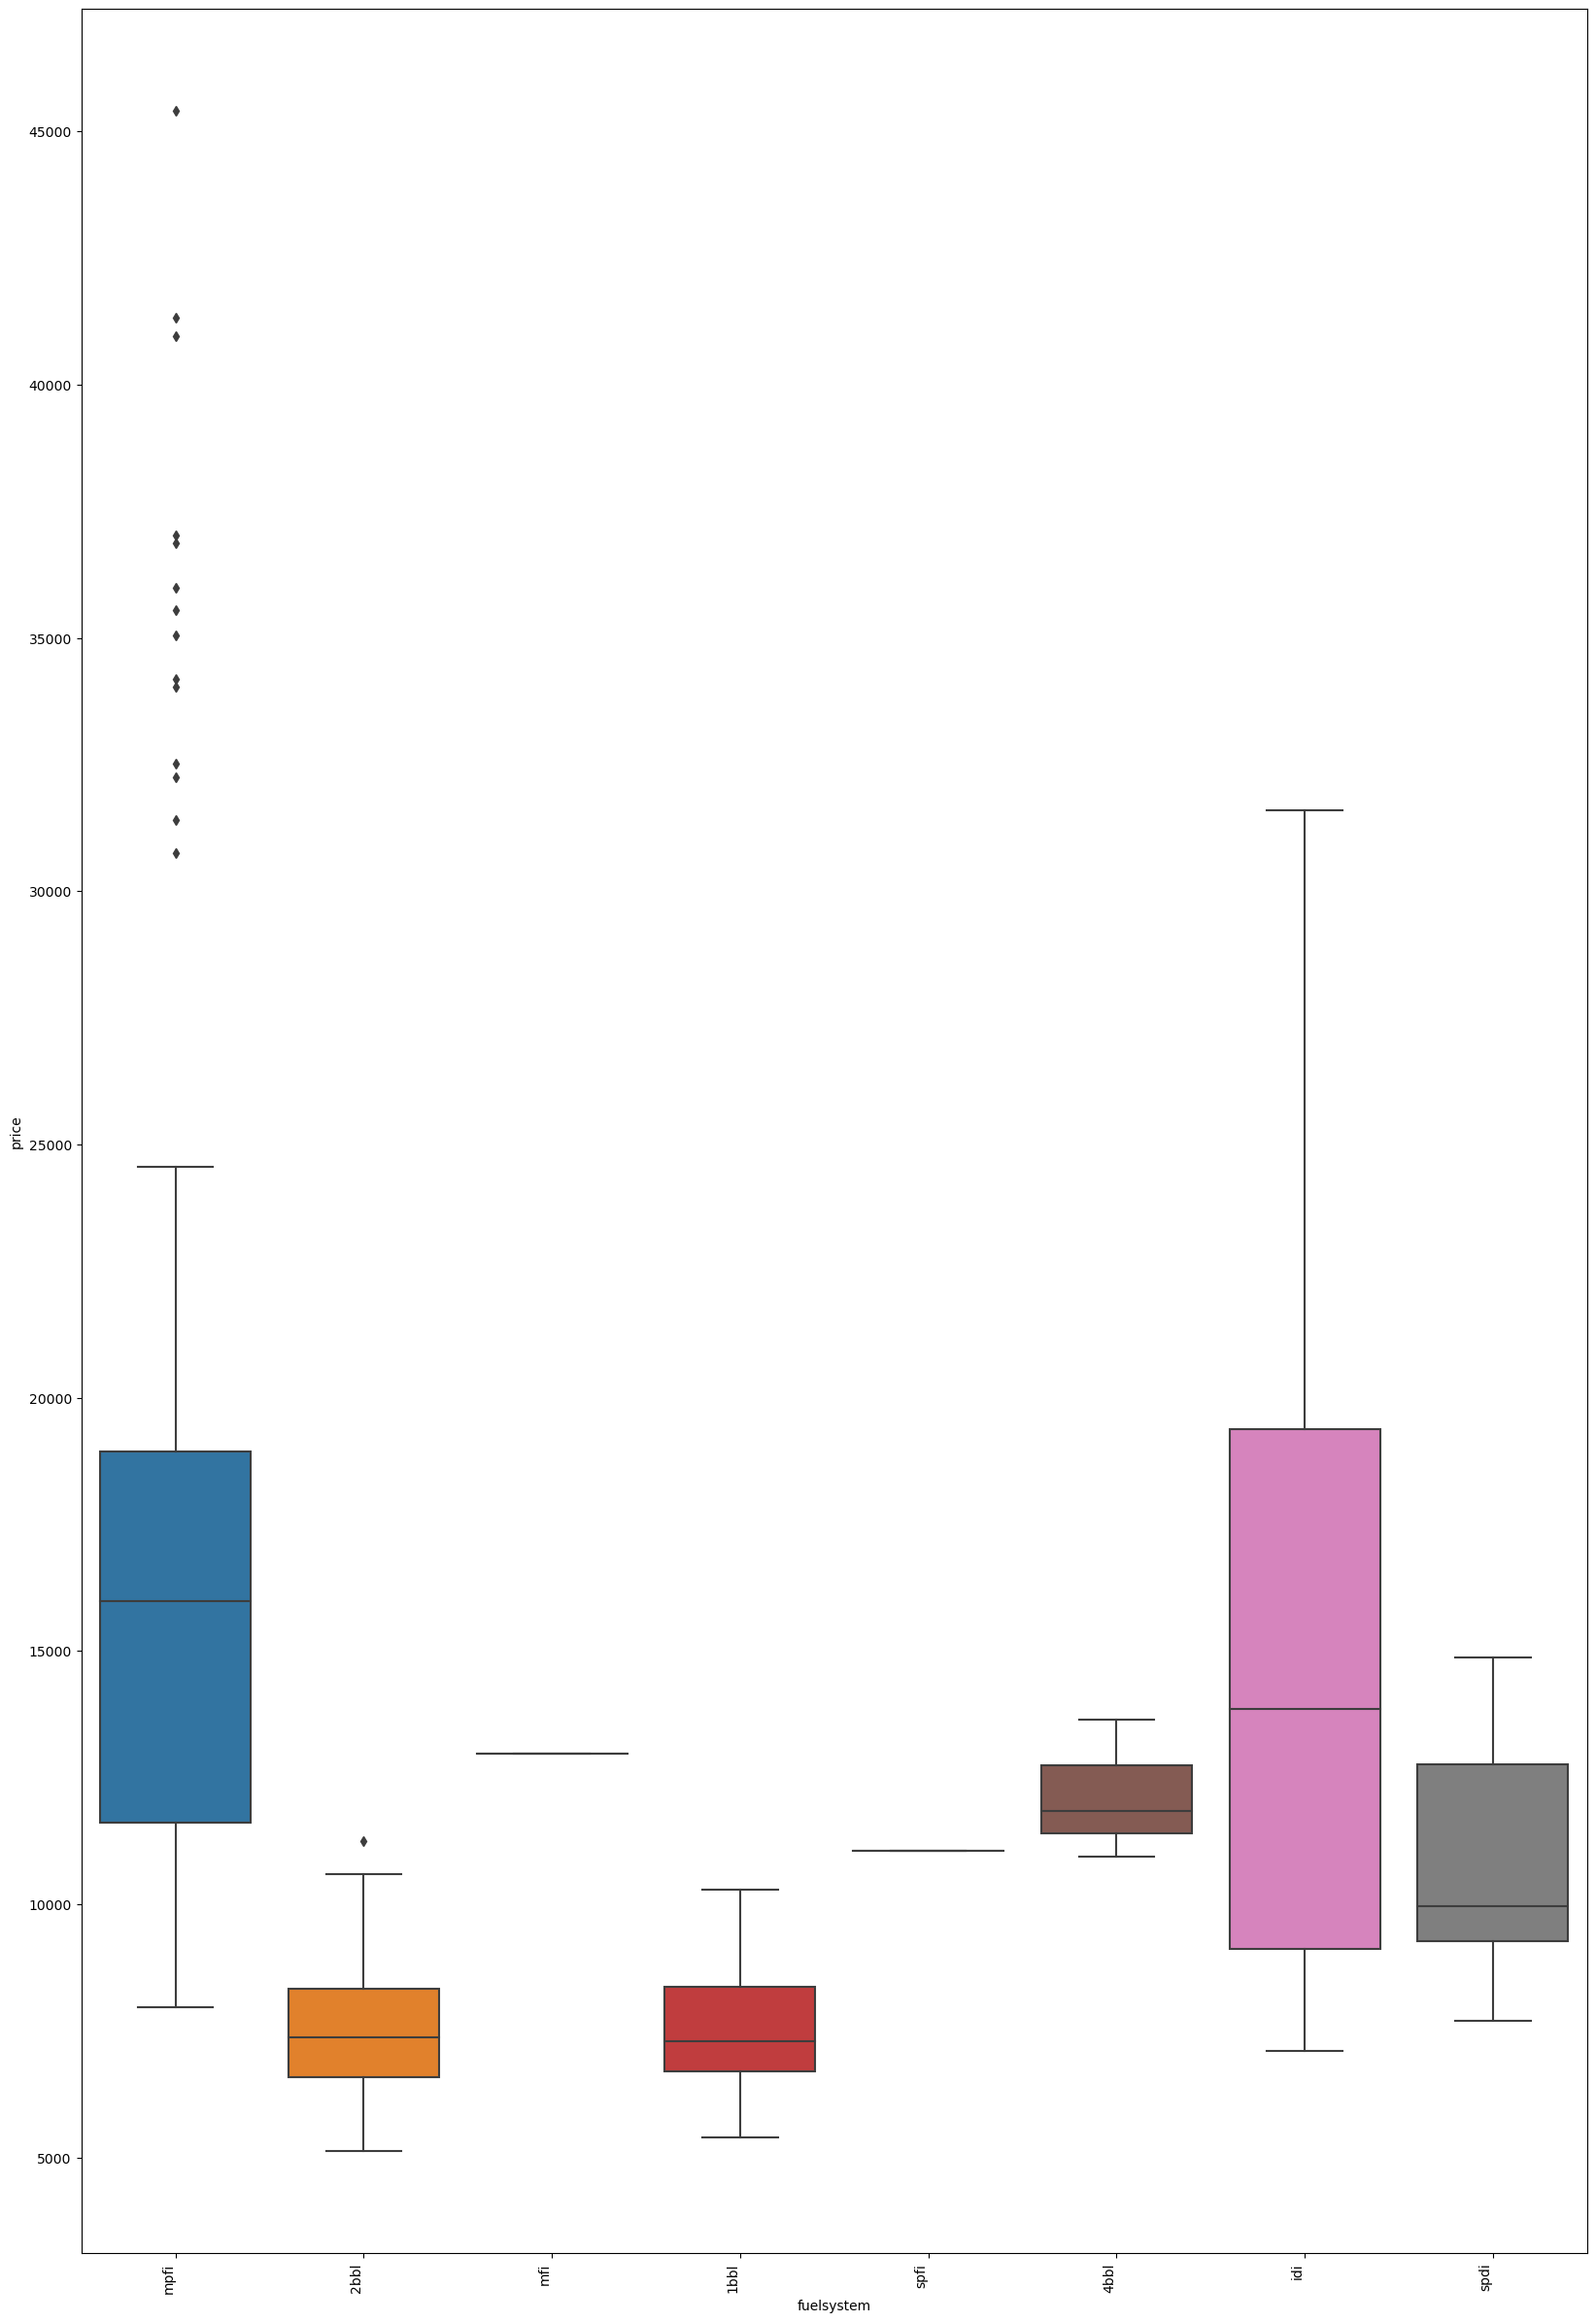

In [23]:
#relationship between Fuelsystem and price
pt.subplots(figsize=(20,30))
a=sb.boxplot(x='fuelsystem',y='price',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
pt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_15900\442563673.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.price)


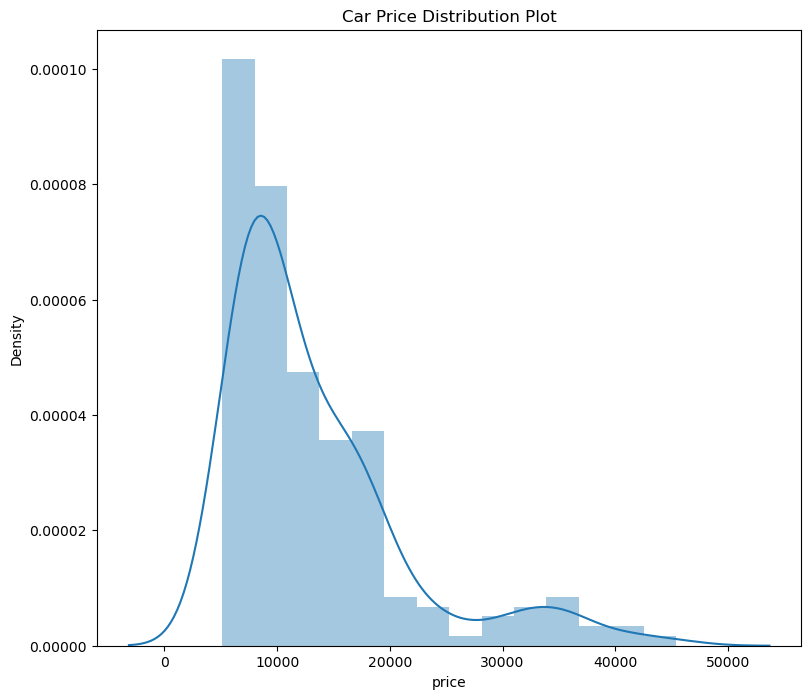

In [24]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,1)
pt.title('Car Price Distribution Plot')
sb.distplot(df.price)
pt.show()

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

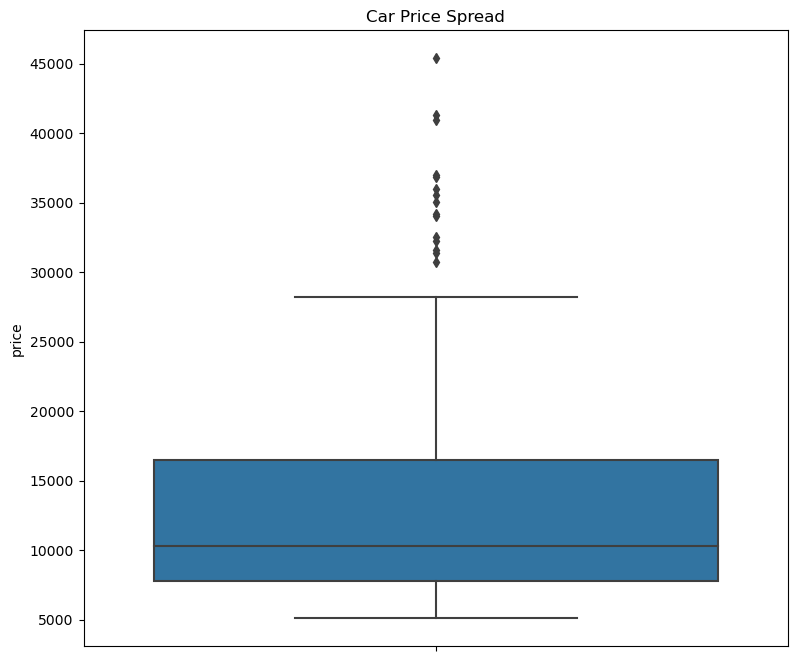

In [25]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,2)
pt.title('Car Price Spread')
sb.boxplot(y=df.price)

Check Correlation

C:\Users\dell\AppData\Local\Temp\ipykernel_15900\3007378885.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrrr=df.corr()


<AxesSubplot:>

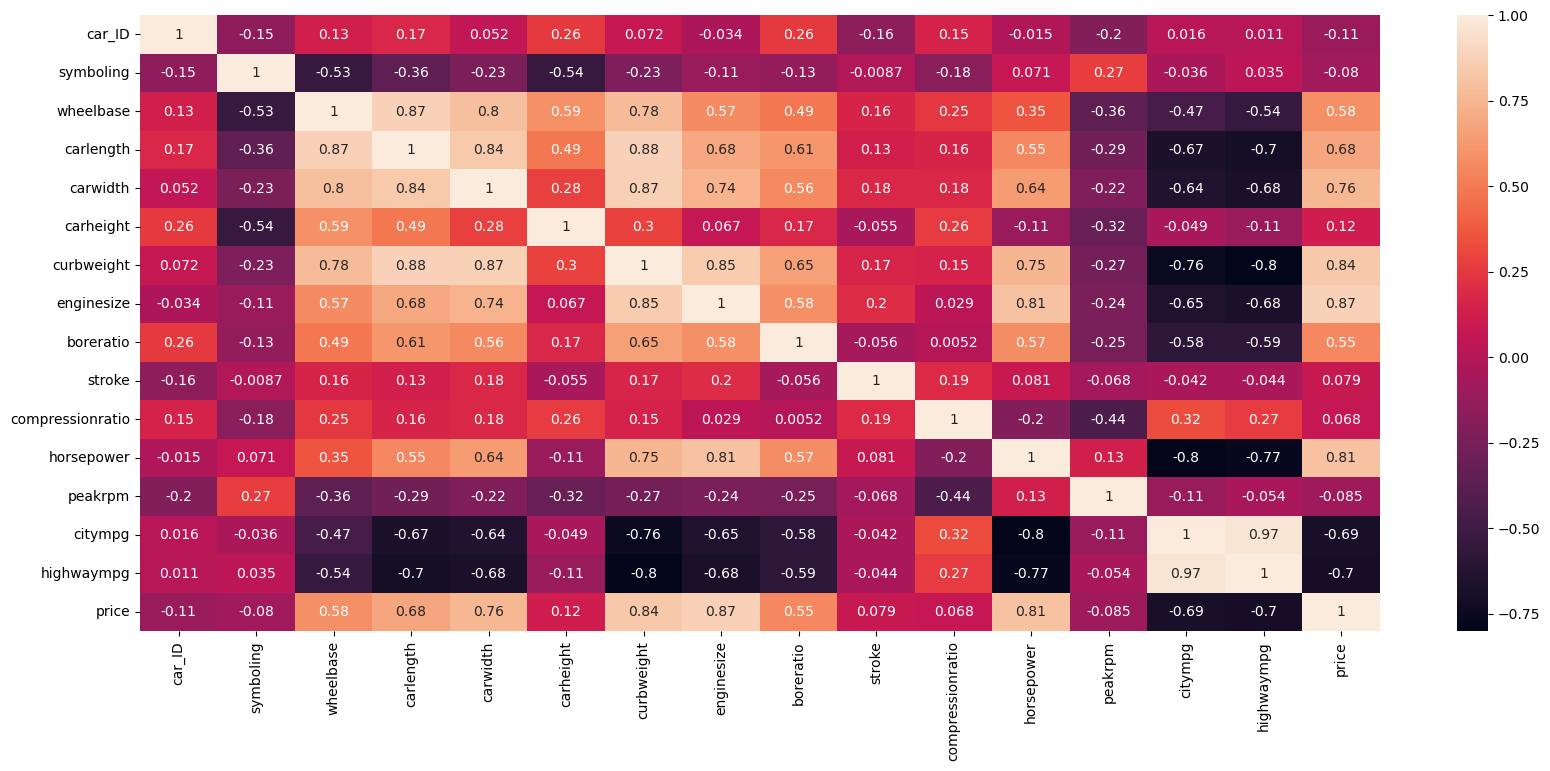

In [26]:
#heatmap
pt.figure(figsize=(20,8))
corrrr=df.corr()
sb.heatmap(corrrr, xticklabels=corrrr.columns, yticklabels=corrrr.columns, annot=True)

Performing One Hot Encoding on Categorical Features

In [27]:
car_data = pd.get_dummies(df, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','cylindernumber','enginelocation','enginetype', 'fuelsystem'],drop_first=True)
print(car_data)

     car_ID  symboling                   CarName  wheelbase  carlength  \
0         1          3        alfa-romero giulia       88.6      168.8   
1         2          3       alfa-romero stelvio       88.6      168.8   
2         3          1  alfa-romero Quadrifoglio       94.5      171.2   
3         4          2               audi 100 ls       99.8      176.6   
4         5          2                audi 100ls       99.4      176.6   
..      ...        ...                       ...        ...        ...   
200     201         -1           volvo 145e (sw)      109.1      188.8   
201     202         -1               volvo 144ea      109.1      188.8   
202     203         -1               volvo 244dl      109.1      188.8   
203     204         -1                 volvo 246      109.1      188.8   
204     205         -1               volvo 264gl      109.1      188.8   

     carwidth  carheight  curbweight  enginesize  boreratio  ...  \
0        64.1       48.8        2548       

Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(car_data.drop(['car_ID','CarName','price'], axis=1),
                                                    df['price'],
                                                    test_size=0.3,
                                                    random_state=50)

In [29]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
77,2,93.7,157.3,64.4,50.8,1944,92,2.97,3.230,9.40,...,0,0,0,1,0,0,0,0,0,0
153,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.030,9.00,...,0,0,0,1,0,0,0,0,0,0
143,0,97.2,172.0,65.4,52.5,2340,108,3.62,2.640,9.00,...,1,0,0,0,0,0,0,1,0,0
57,3,95.3,169.0,65.7,49.6,2385,70,3.33,3.255,9.40,...,0,0,1,0,1,0,0,0,0,0
131,2,96.1,176.8,66.6,50.5,2460,132,3.46,3.900,8.70,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.070,9.31,...,0,0,0,0,0,0,0,1,0,0
33,1,93.7,150.0,64.0,52.6,1940,92,2.91,3.410,9.20,...,0,0,0,0,0,0,0,0,0,0
109,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.190,8.40,...,0,0,0,0,0,0,0,1,0,0
139,2,93.7,157.9,63.6,53.7,2120,108,3.62,2.640,8.70,...,1,0,0,1,0,0,0,0,0,0


In [30]:
np.round(X_train.describe(), 1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0
mean,0.8,98.7,173.8,66.0,53.8,2547.0,125.9,3.3,3.2,10.1,...,0.1,0.1,0.0,0.3,0.0,0.1,0.0,0.5,0.0,0.0
std,1.3,6.0,12.5,2.2,2.5,526.0,41.9,0.3,0.3,3.8,...,0.3,0.3,0.2,0.5,0.1,0.3,0.1,0.5,0.2,0.1
min,-2.0,86.6,141.1,60.3,47.8,1488.0,61.0,2.5,2.1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,94.5,166.3,64.2,52.0,2142.5,97.0,3.1,3.1,8.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,97.0,173.2,65.5,54.1,2414.0,119.0,3.3,3.3,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,102.2,181.6,66.9,55.6,2919.0,141.0,3.6,3.4,9.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,3.0,115.6,202.6,72.3,59.8,4066.0,326.0,3.9,4.2,23.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Perform Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[ 0.92074567, -0.83440176, -1.31923908, ..., -0.95219046,
        -0.16963779, -0.08391814],
       [-0.66559928, -0.49866892, -0.32591647, ..., -0.95219046,
        -0.16963779, -0.08391814],
       [-0.66559928, -0.24686929, -0.14167115, ...,  1.05021006,
        -0.16963779, -0.08391814],
       ...,
       [-0.66559928,  2.60685987,  2.01319805, ...,  1.05021006,
        -0.16963779, -0.08391814],
       [ 0.92074567, -0.83440176, -1.27117508, ..., -0.95219046,
        -0.16963779, -0.08391814],
       [-1.45877175,  0.6260361 ,  0.14671283, ...,  1.05021006,
        -0.16963779, -0.08391814]])

In [35]:
scaler.mean_

array([8.39160839e-01, 9.86706294e+01, 1.73768531e+02, 6.59650350e+01,
       5.38188811e+01, 2.54699301e+03, 1.25916084e+02, 3.32440559e+00,
       3.24496503e+00, 1.00819580e+01, 1.04552448e+02, 5.14685315e+03,
       2.50629371e+01, 3.05454545e+01, 9.09090909e-01, 1.74825175e-01,
       4.33566434e-01, 2.09790210e-02, 3.56643357e-01, 4.47552448e-01,
       1.39860140e-01, 5.94405594e-01, 3.63636364e-01, 6.29370629e-02,
       7.62237762e-01, 1.04895105e-01, 6.99300699e-03, 6.99300699e-03,
       2.79720280e-02, 1.39860140e-02, 6.99300699e-03, 4.89510490e-02,
       7.27272727e-01, 6.99300699e-02, 7.69230769e-02, 2.79720280e-02,
       3.21678322e-01, 2.09790210e-02, 9.09090909e-02, 6.99300699e-03,
       4.75524476e-01, 2.79720280e-02, 6.99300699e-03])

Convert Numpy Array to DataFrame

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [37]:
X_train_scaled.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,-3.726623e-17,3.338433e-17,-7.608521e-16,9.381773e-15,-1.512388e-15,1.125751e-16,-8.384901e-17,1.018610e-15,-6.211038e-17,-6.358550e-16,...,-2.794967e-17,-2.639691e-17,6.211038e-18,5.279382e-17,-3.726623e-17,1.552759e-17,5.589934e-17,4.658278e-17,-2.484415e-17,6.211038e-18
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00
min,-2.251944e+00,-2.026253e+00,-2.616967e+00,-2.582742e+00,-2.398327e+00,-2.020416e+00,-1.555678e+00,-2.836203e+00,-3.900329e+00,-8.080644e-01,...,-2.742042e-01,-2.886751e-01,-1.696378e-01,-6.886413e-01,-1.463850e-01,-3.162278e-01,-8.391814e-02,-9.521905e-01,-1.696378e-01,-8.391814e-02
25%,-6.655993e-01,-7.001086e-01,-5.982791e-01,-8.274914e-01,-7.247646e-01,-7.717183e-01,-6.929581e-01,-6.667618e-01,-4.480201e-01,-3.885574e-01,...,-2.742042e-01,-2.886751e-01,-1.696378e-01,-6.886413e-01,-1.463850e-01,-3.162278e-01,-8.391814e-02,-9.521905e-01,-1.696378e-01,-8.391814e-02
50%,1.275732e-01,-2.804426e-01,-4.554316e-02,-2.120138e-01,1.120167e-01,-2.537328e-01,-1.657402e-01,2.022789e-02,8.310425e-02,-2.836806e-01,...,-2.742042e-01,-2.886751e-01,-1.696378e-01,-6.886413e-01,-1.463850e-01,-3.162278e-01,-8.391814e-02,-9.521905e-01,-1.696378e-01,-8.391814e-02
75%,9.207457e-01,5.924628e-01,6.273528e-01,4.262593e-01,7.296409e-01,7.097394e-01,3.614778e-01,9.241616e-01,5.146428e-01,-1.788039e-01,...,-2.742042e-01,-2.886751e-01,-1.696378e-01,1.452135e+00,-1.463850e-01,-3.162278e-01,-8.391814e-02,1.050210e+00,-1.696378e-01,-8.391814e-02
max,1.713918e+00,2.841873e+00,2.309593e+00,2.888170e+00,2.383280e+00,2.898061e+00,4.794901e+00,2.225826e+00,3.070679e+00,3.387006e+00,...,3.646917e+00,3.464102e+00,5.894913e+00,1.452135e+00,6.831301e+00,3.162278e+00,1.191638e+01,1.050210e+00,5.894913e+00,1.191638e+01


Apply Linear Regression Model

In [38]:
model1 = LinearRegression()
model1.fit(X_train_scaled,y_train)

LinearRegression()

In [39]:
print("Accuracy: ",model1.score(X_test_scaled, y_test) * 100)

Accuracy:  87.52868048245446


In [40]:
y_predt= model1.predict(X_test_scaled)

In [41]:
Mean_absolute_error = mean_absolute_error(y_test,y_predt)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_absolute_error: 1993.9756439411267


In [42]:
Mean_squared_error = mean_squared_error(y_test,y_predt)
print('Mean_squared_error:',Mean_squared_error)

Mean_squared_error: 8018989.284602919


In [43]:
Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root_Mean_squared_error:',Root_Mean_squared_error)

Root_Mean_squared_error: 2831.7819980716945


In [44]:
R_Squared = r2_score(y_test,y_predt)
print('R-Squared:',R_Squared)

R-Squared: 0.8752868048245446


In [45]:
AdjRsquared = 1-((1-R_Squared)*(len(X_train)-1)/(len(X_train)))
print(AdjRsquared)

0.8761589250705268


In [46]:
y_predt

array([16027.99882292, 12738.77486814, 20235.75681528, 44939.00308079,
       12999.31639704,  7074.32489985, 13604.95568098, 20557.90083131,
        8594.67833537,  6257.15662336, 13497.39680687,  7449.50807151,
       23951.39190424, 10858.37493118,  7408.16910543, 10401.90181772,
       13068.50170336,  9398.27580512,  8750.13531321, 10694.15520745,
        5273.65222703, 13697.33591541,  6546.39878585, 23022.91095903,
        7149.80512204, 19417.34681299, 17779.75288169,  7136.46517411,
        4904.81689408, 12389.85687818, 15425.17587993,  6414.91438727,
        6643.75592864,  9056.39299872,  5749.94734141,  7387.3464767 ,
       11780.18826015,  6413.81717564,  8973.99446433,  8577.84573529,
        9338.75395636, 22504.87018169,  8302.49506177,  7559.08604844,
        6740.85860562, 17113.56513959, 33995.64919462,  9838.10124345,
       20686.27226625,  7533.67590377, 13406.8441817 , 18953.28691328,
        8474.12857559, 14120.51030712, 20810.18906228, 33140.34079487,
      

In [47]:
y_test

113    16695.0
170    11199.0
12     20970.0
73     40960.0
145    11259.0
        ...   
173     8948.0
61     10595.0
16     41315.0
103    13499.0
112    16900.0
Name: price, Length: 62, dtype: float64

In [48]:
y_test - y_predt

113      667.001177
170    -1539.774868
12       734.243185
73     -3979.003081
145    -1740.316397
           ...     
173    -1087.814403
61      1356.463847
16     12203.320055
103    -2410.636602
112    -1013.952109
Name: price, Length: 62, dtype: float64

Apply Decision Tree Model

In [49]:
# Create the Decision Tree Regressor
model2 = DecisionTreeRegressor(random_state=42)

# Train the model
model2.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [50]:
y_pred = model2.predict(X_test_scaled)

In [51]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")

Mean Squared Error (MSE): 9178574.036290323
R-squared (R²): 0.8572526718026504


In [52]:
print("Accuracy: ",model2.score(X_test_scaled, y_test) * 100)

Accuracy:  85.72526718026504


Apply Random Forest Regressor Model

In [54]:
# Create the Random Forest Regressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model3.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [55]:
print("Accuracy: ",model3.score(X_test_scaled, y_test) * 100)

Accuracy:  91.57532613843746


In [56]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model3, open(filename, 'wb'))

In [57]:
load_model = pickle.load(open(filename,'rb'))

Random Forest Regressor give Higher Accuracy =91.57%